Aufgabe:
- python colab
- graph visualisieren (matplot)
- per tastenkommando weiter gehen
- Schrittweite immer erhöhen/verringern iterieren
- abbruchkriterium: 1% genauigkeit

Algo:
y=m*x



![Excel](../Excel_Vorlage.jpg)

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output


In [9]:
# Methods
def calc(m,x):
    y = []
    for num in x:
        y.append(m * num)
    return y

def calc_error(xlist,ki_ylist):
    subtracted = np.subtract(ki_ylist, xlist)
    subtracted = subtracted * subtracted
    sum_qerror = sum(subtracted)
    return sum_qerror

# Plot
def plot(xlist,my_ylist,ki_ylist,m,err,sw):
    plt.clf()
    plt.plot(xlist,my_ylist,"-o",label="my",color="g")
    plt.plot(xlist,ki_ylist,"-o",label="ki",color="m")
    #plt.text(2,2,err,bbox=dict(facecolor='red', alpha=0.5,boxstyle="round"))
    plt.title(f"y = {m} * x, Error = {err}, Schrittweite = {sw}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


# Create List for x values
xlist = [l+1 for l in range(9)]
my_ylist = [2,4,6,7,11,12,15,17,20]
ki_ylist = calc(2,xlist)
fehler= calc_error(xlist,ki_ylist)
#m = 2

print(f"x: {xlist}")
print(f"my y: {my_ylist}")
print(f"ki y: {ki_ylist}")
print(f"fehler: {fehler}")



x: [1, 2, 3, 4, 5, 6, 7, 8, 9]
my y: [2, 4, 6, 7, 11, 12, 15, 17, 20]
ki y: [2, 4, 6, 8, 10, 12, 14, 16, 18]
fehler: 285


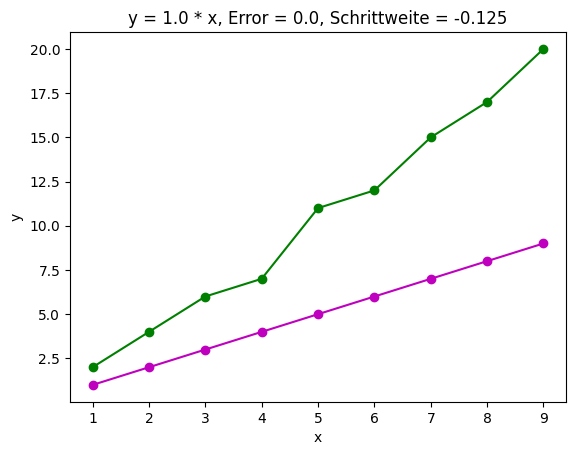

Current Err: 0.0
Err List: [2565.0, 4560.0, 3491.25, 2565.0, 1781.25, 1140.0, 641.25, 285.0, 71.25, 0.0, 71.25, 17.8125, 0.0, 17.8125, 4.453125]
Last SW: -0.125
SW List: [1.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 0.25, 0.25, 0.25, -0.125, -0.125]


In [11]:
m = 4.0
sw = 1.0
err_lst = []
sw_lst = []
while True:
    clear_output(wait=True)
    ki_ylist = calc(m,xlist)
    err = calc_error(xlist,ki_ylist)
    plot(xlist=xlist,my_ylist=my_ylist, ki_ylist=ki_ylist,m=m,err = err,sw=sw)
    print(f"Current Err: {err}")
    print(f"Err List: {err_lst}")
    print(f"Last SW: {sw}")
    print(f"SW List: {sw_lst}")
    if err_lst and err!= 0.0 :
        if float(err_lst[-1]) - float(err) < 0 : #if  err > err_lst[-1]:
            sw = sw * -1
            sw = sw / 2

    err_lst.append(err)
    sw_lst.append(sw)
    m=m+sw
    inp = input("Continue? any/n")
    if inp == "n":
        m = 2
        break
    #if genauigkeit <= 1:
        #break

